In [13]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("/home/sracha/proper_kg_project/scripts/gen_triplet_rag_explanations/outputs/find_usefulness/angst/run_2025_05_29_22_15_51/angst_merged.csv")
df.head()

,id,question,answer,triplets,label,justification
0,8qKeYR,"Classify whether the given text is Depression,...",Normal,"(COVI - Verbal Report, Definition: '1. Covi An...",Useful,This triplet relates to anxiety measurement an...
1,8qKeYR,"Classify whether the given text is Depression,...",Normal,"(COVI - Verbal Report, Definition: '1. Covi An...",Useful,"Similar to the previous triplet, this one conn..."
2,8qKeYR,"Classify whether the given text is Depression,...",Normal,(PROMIS short form - emotional distress - anxi...,Useful,This triplet connects a specific measurement t...
3,8qKeYR,"Classify whether the given text is Depression,...",Normal,"(Covi Anxiety Scale Clinical Classification, D...",Useful,This triplet emphasizes the standardized asses...
4,8qKeYR,"Classify whether the given text is Depression,...",Normal,(Generalized Anxiety Disorder - 7 Version 2 - ...,Useful,This triplet connects a specific anxiety disor...


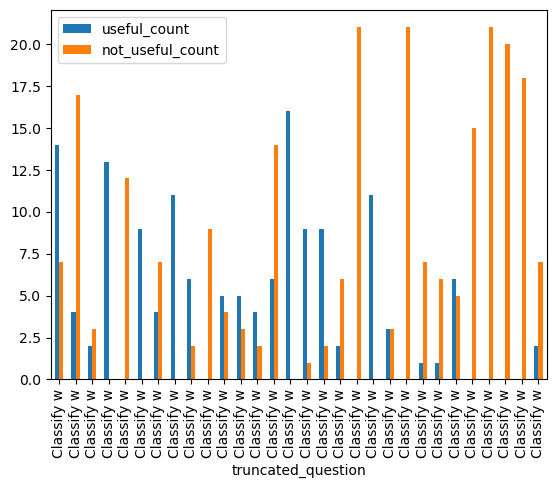

In [20]:
# groupby question and create two columns named 'useful' and 'not useful' that contain the number of times each label appears
useful_count = df.groupby('question')['label'].apply(lambda x: (x == 'Useful').sum()).reset_index(name='useful_count')
not_useful_count = df.groupby('question')['label'].apply(lambda x: (x == 'Not Useful').sum()).reset_index(name='not_useful_count')

# merge the two dataframes on the 'question' column
merged_df = pd.merge(useful_count, not_useful_count, on='question')
merged_df['truncated_question'] = merged_df['question'].apply(lambda x: x[:10])

# plot the number of useful and not useful explanations for each question
merged_df.plot(kind='bar', x='truncated_question', y=['useful_count', 'not_useful_count'])
plt.show()


In [19]:
useful_count.head()

,question,useful_count
0,"Classify whether the given text is Depression,...",14
1,"Classify whether the given text is Depression,...",4
2,"Classify whether the given text is Depression,...",2
3,"Classify whether the given text is Depression,...",13
4,"Classify whether the given text is Depression,...",0
